In [2]:
#Created on Tue May 31  11:28:21 2020

#@author: Vineeth Govind

import pandas as pd, numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import itertools

#to display output in non scientific format(not exponential)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#1)Read the data as a data frame using pandas
concrete=pd.read_csv("concrete.csv")
print(concrete.head())

     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 141.30000 212.00000   0.00000 203.50000       0.00000  971.80000 748.50000   
1 168.90000  42.20000 124.30000 158.30000      10.80000 1080.80000 796.20000   
2 250.00000   0.00000  95.70000 187.40000       5.50000  956.90000 861.20000   
3 266.00000 114.00000   0.00000 228.00000       0.00000  932.00000 670.00000   
4 154.80000 183.40000   0.00000 193.30000       9.10000 1047.40000 696.70000   

   age  strength  
0   28  29.89000  
1   14  23.51000  
2   28  29.22000  
3   28  45.85000  
4   28  18.29000  


In [3]:
#Shape of the data
print('data shape is:', concrete.shape)

data shape is: (1030, 9)


In [4]:
#Data type of each attribut numerical descriptive stats for the data set
concrete.info()

#There are no categorical variables that require encoding
print('numerical descriptive stats for the data set \n',concrete.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
numerical descriptive stats for the data set 
                   count      mean       std       min       25%       50%  \
cement       1030.00000 281.16786 104.50636 102.00000 192.37500 272.90000   
slag         1030.00000  73.89583  86.27934   0.00000   0.00000  22.00000   
ash          1030.00000  54.18835  63.99700   0.00000   0.00000   0.00000   
water        10

In [5]:
#1c)checking for missing values 
print('Number of missing values are \n', concrete.isnull().sum())

Number of missing values are 
 cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [6]:
#There are no missing values
# outlier determination function
def outlier(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

#calling the function to determine  outliers
cement_outlier_list = []
cement_outlier =outlier(concrete.cement)
cement_outlier_list.append(cement_outlier)
print("cement_outlier is \n",cement_outlier_list)

slag_outlier_list = []
slag_outlier =outlier(concrete.slag)
slag_outlier_list.append(slag_outlier)
print("slag_outlier is \n",slag_outlier_list)

ash_outlier_list = []
ash_outlier =outlier(concrete.ash)
ash_outlier_list.append(ash_outlier)
print("ash_outlier is \n",ash_outlier_list)

water_outlier_list = []
water_outlier =outlier(concrete.water)
water_outlier_list.append(water_outlier)
print("water_outlier is \n",water_outlier_list)

superplastic_outlier_list = []
superplastic_outlier =outlier(concrete.superplastic)
superplastic_outlier_list.append(superplastic_outlier)
print("superplastic_outlier is \n",superplastic_outlier_list)

coarseagg_outlier_list = []
coarseagg_outlier =outlier(concrete.coarseagg)
coarseagg_outlier_list.append(coarseagg_outlier)
print("coarseagg_outlier is \n",coarseagg_outlier_list)

fineagg_outlier_list = []
fineagg_outlier =outlier(concrete.fineagg)
fineagg_outlier_list.append(fineagg_outlier)
print("fineagg_outlier is \n",fineagg_outlier_list)

age_outlier_list = []
age_outlier =outlier(concrete.age)
age_outlier_list.append(age_outlier)
print("age_outlier is \n",age_outlier_list)

cement_outlier is 
 [(array([], dtype=int64),)]
slag_outlier is 
 [(array([918, 990], dtype=int64),)]
ash_outlier is 
 [(array([], dtype=int64),)]
water_outlier is 
 [(array([ 66, 263, 432, 462, 587, 740, 789, 826, 914], dtype=int64),)]
superplastic_outlier is 
 [(array([  44,  156,  232,  292,  538,  744,  816,  838,  955, 1026],
      dtype=int64),)]
coarseagg_outlier is 
 [(array([], dtype=int64),)]
fineagg_outlier is 
 [(array([129, 447, 504, 584, 857], dtype=int64),)]
age_outlier is 
 [(array([  51,   64,   93,   99,  103,  133,  144,  149,  152,  157,  159,
        198,  199,  207,  256,  262,  270,  297,  302,  312,  313,  323,
        359,  361,  370,  393,  448,  465,  484,  539,  570,  581,  594,
        601,  620,  622,  623,  632,  642,  696,  713,  720,  721,  754,
        755,  776,  850,  861,  878,  900,  901,  919,  951,  957,  971,
        985,  995, 1017, 1028], dtype=int64),)]


In [7]:
concrete['slag'].values[concrete['slag'].values>=918 ]=concrete.slag.mean()
concrete['water'].values[concrete['water'].values>=66 ]=concrete.water.mean()
concrete['superplastic'].values[concrete['superplastic'].values>=44 ]=concrete.superplastic.mean()
concrete['fineagg'].values[concrete['fineagg'].values>=129 ]=concrete.fineagg.mean()
concrete['age'].values[concrete['age'].values>=51 ]=concrete.age.mean()

#checking for imbalance in target column
strength_dist = concrete['strength'].value_counts()
print("strength distribution is\n",strength_dist)
#target column data seems evenly distributed

strength distribution is
 33.40000    6
79.30000    4
41.05000    4
71.30000    4
35.30000    4
           ..
61.23000    1
26.31000    1
38.63000    1
47.74000    1
15.75000    1
Name: strength, Length: 845, dtype: int64


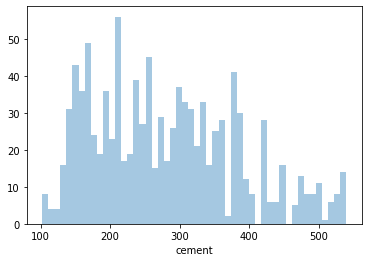

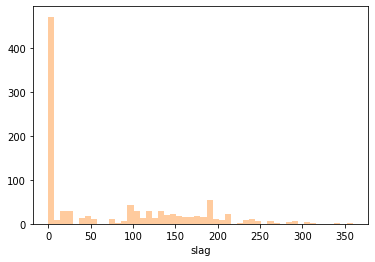

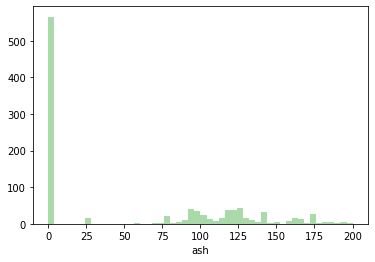

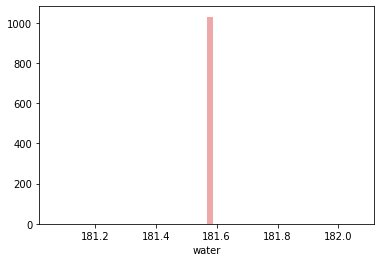

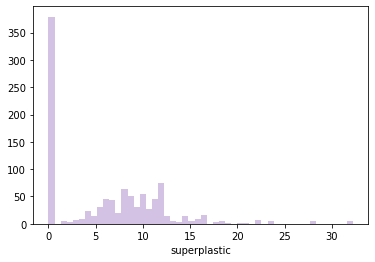

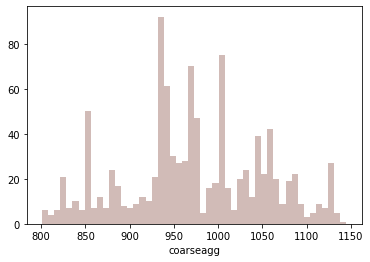

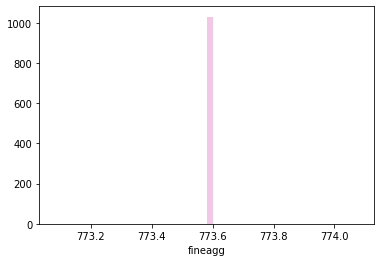

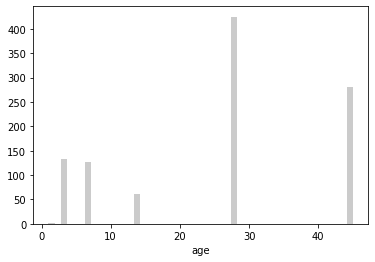

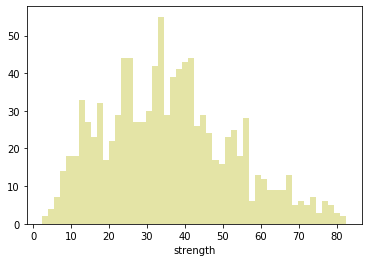

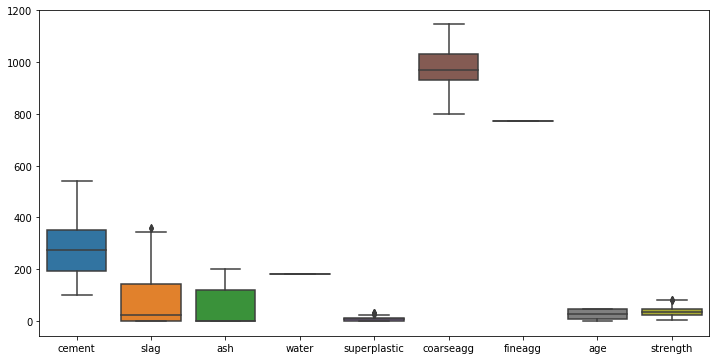

In [8]:
#Univariate analysis
#histogram
palette = itertools.cycle(sns.color_palette())
for i, col in enumerate(concrete.columns):
   plt.figure(i)
   sns.distplot(concrete[col],kde=False,color=next(palette),bins=50,hist=True) 
#boxplot

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete)  

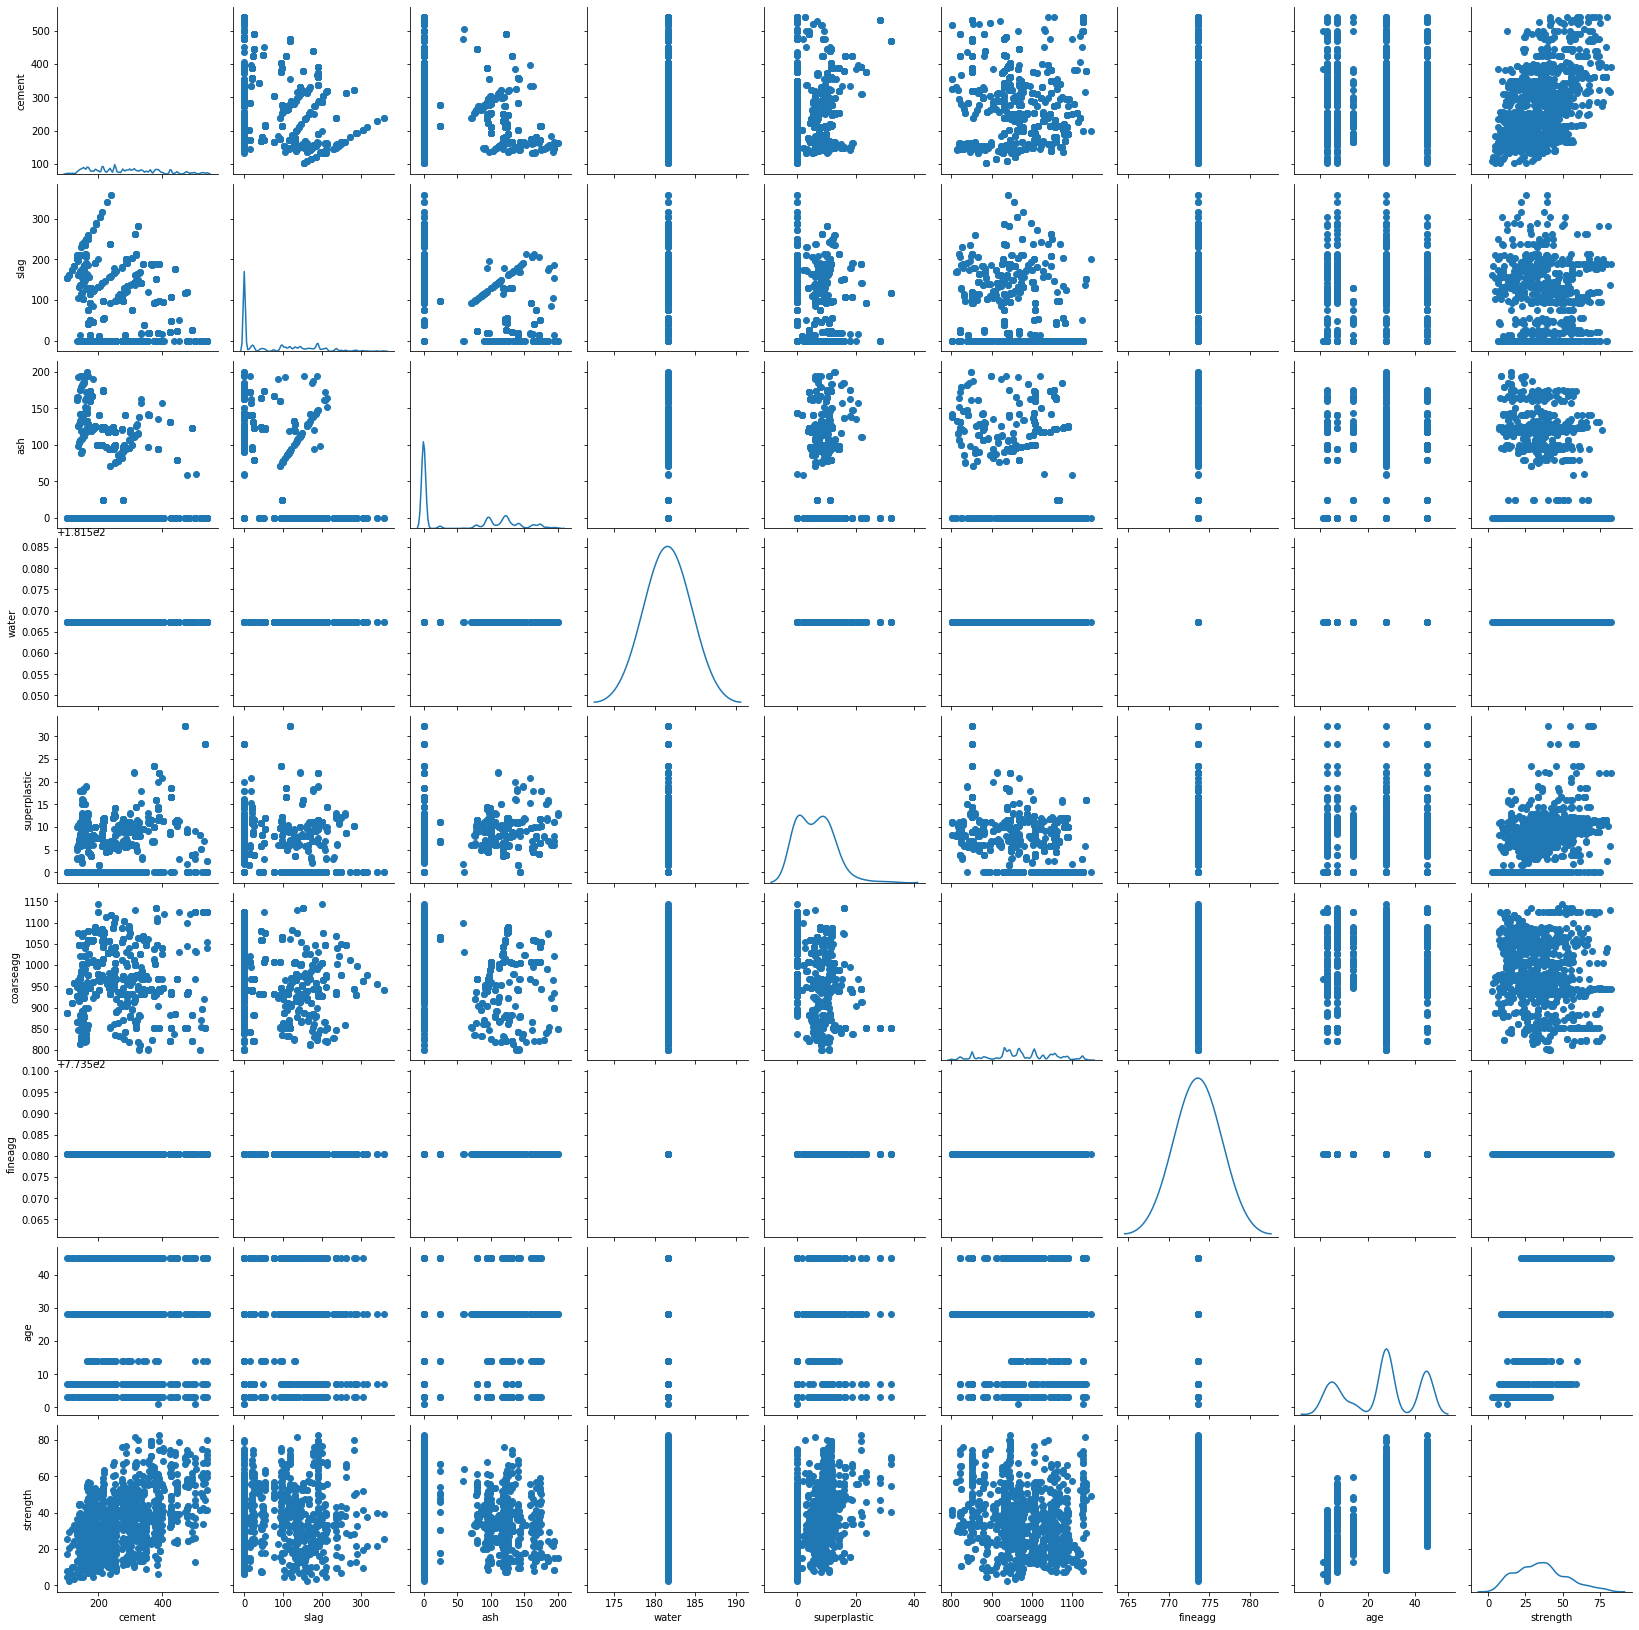

In [9]:
#1b)Multivariate analysis  
#pairplot    

g = sns.PairGrid(concrete)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot, bw=3, legend=True);

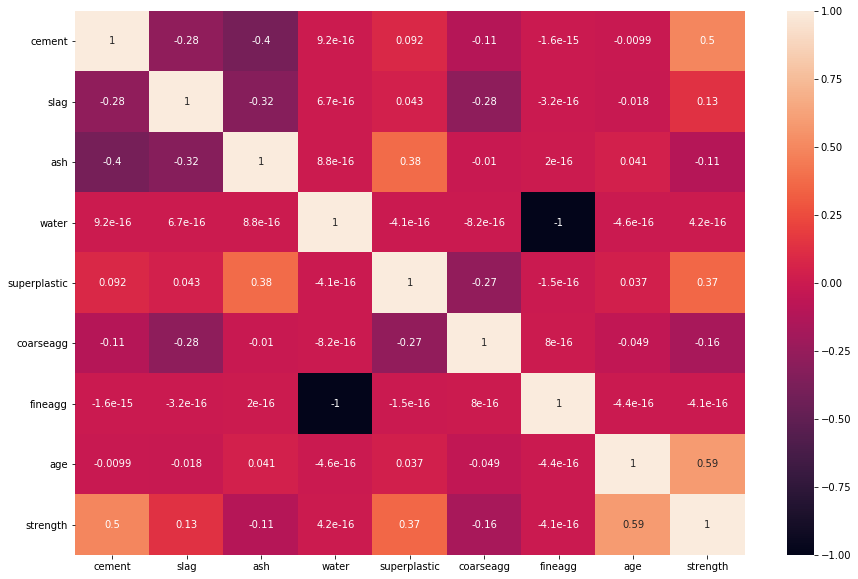

coarseagg      -0.16493
ash            -0.10575
fineagg        -0.00000
water           0.00000
slag            0.13483
superplastic    0.36608
cement          0.49783
age             0.58678
strength        1.00000
Name: strength, dtype: float64 

coarseagg      -0.16493
ash            -0.10575
fineagg        -0.00000
water           0.00000
slag            0.13483
superplastic    0.36608
cement          0.49783
age             0.58678
strength        1.00000
Name: strength, dtype: float64


In [10]:
#obervations

#Diagonal analysis + dist plots analysis
#distribution of cement seems normal
#Slag and ash are  skewed
#Water and finagg have near normal distributions
#Age and superlastic have multiple gaussians
#Strength is normally distributed

#Off-diagonal analysis with strength
#Cement has a strong correlation with strength
#Slag is a very weak predictor because the distribution is scattered
#ash and  coarseagg  are also weak predictors
#Water and fineagg appears to have a no correlation with strength
#Superplastic appears to have positive correlation with strength
#age also has weak correlation with strength

#Check for correlated columns and plot heatmap
corr=concrete[concrete.columns].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot = True ) 
plt.show()

#Find all correlations and sort 
correlations_data =concrete.corr()['strength'].sort_values()
np.set_printoptions(suppress=True)
# Print the most negative correlations
print(correlations_data.head(15), '\n')
# Print the most positive correlations
print(correlations_data.tail(15))
#it can be inferred from the heatmap and the correlations score that age ,cement and superplastic 

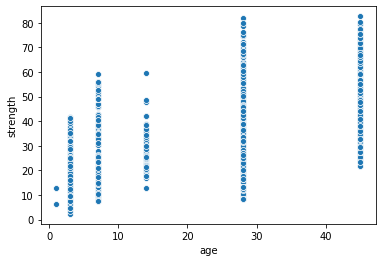

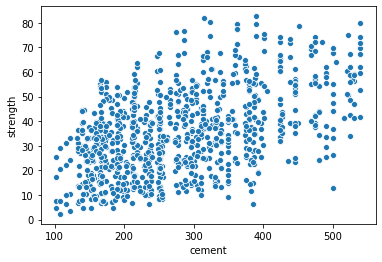

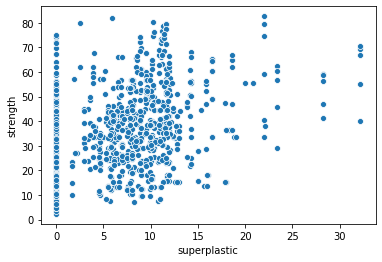

In [11]:
#scatter plot of the 3 most important attributes as per correlation
sns.scatterplot(y="strength", x="age", data=concrete)
plt.show()
sns.scatterplot(y="strength", x="cement", data=concrete)
plt.show()
sns.scatterplot(y="strength", x="superplastic", data=concrete)
plt.show()

In [12]:
#2) feature engineering 
#data scaling  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(concrete)

X=concrete.drop('strength',axis=1)
y=concrete['strength']
y=y.astype('int')

#2a)choosing best attributes using univariate feature analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores)  #print   features score

          Specs       Score
0        cement 13071.19514
1          slag 12782.66946
2           ash  9571.11803
3         water     0.00000
4  superplastic  1458.33946
5     coarseagg   983.37480
6       fineagg     0.00000
7           age  3834.42634


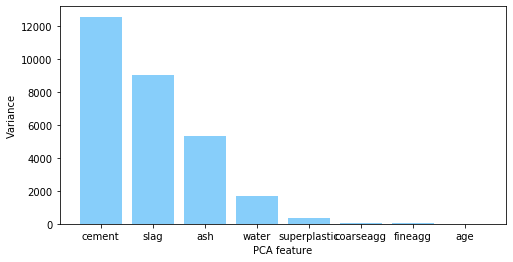

Explained variance is 
 [12586.20182572  9049.36610071  5334.49731753  1670.09887813
   338.9090264     47.33169895    18.57417512     0.        ]


In [13]:
#creating composite features using PCA

from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca.fit(concrete)
# atures = range(pca.n_components_)
features = concrete.columns
plt.figure(figsize=(8,4))
#pt.bar(features[:8], pca.explained_variance_[:8], color='lightskyblue')
plt.bar(features[:8], pca.explained_variance_[:8], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:8])
plt.show()
explained_variance = pca.explained_variance_[:8]
#print the array in the decimal format instead of exponential
np.set_printoptions(suppress=True)
print('Explained variance is \n',explained_variance)

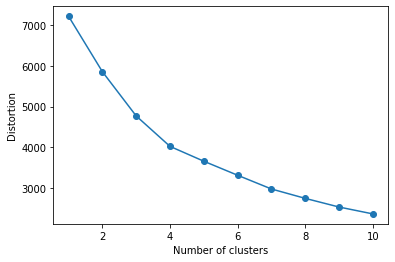

In [14]:
#From the plot it can be inferred that 4 component(cement,slag,ash,water) captures around 95% of the variance in the data

#2b) COMPLEXITY OF THE MODEL-THE MODEL SHOULD BE A CUBIC MODEL( POWER 3) AS ITS REQUIRES 4 COMPONENTS
# TO CAPTURE AROUND 95% OF VARIANCE

#2c)FROM THE DIAGONAL OF THE PAIRPLOT IT CAN BE INFERRED THAT SUPERPLASTIC 
#AND AGE ARE A MIXTURE OF GUASSIANS

#elbow method for finding n_clusters for kmeans clustering 
from sklearn.cluster import KMeans
from scipy.stats import zscore
mult_guassian_z= concrete.apply(zscore)

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(mult_guassian_z)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [15]:
#elbow method shows optimal value of n_clusters as 3
#kmeans clustering
km_conc = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

prediction=km_conc.fit_predict(mult_guassian_z)

mult_guassian_z["group"]=prediction
print("Groups Assigned : \n",mult_guassian_z.head())

Groups Assigned : 
     cement     slag      ash    water  superplastic  coarseagg  fineagg  \
0 -1.33902  1.60144 -0.84714 -1.00000      -1.03914   -0.01440  1.00000   
1 -1.07479 -0.36754  1.09608 -1.00000       0.76962    1.38814  1.00000   
2 -0.29838 -0.85689  0.64897 -1.00000      -0.11801   -0.20612  1.00000   
3 -0.14521  0.46504 -0.84714 -1.00000      -1.03914   -0.52652  1.00000   
4 -1.20978  1.26980 -0.84714 -1.00000       0.48491    0.95837  1.00000   

       age  strength  group  
0  0.13920  -0.35502      2  
1 -0.79832  -0.73711      1  
2  0.13920  -0.39514      1  
3  0.13920   0.60081      2  
4  0.13920  -1.04973      2  


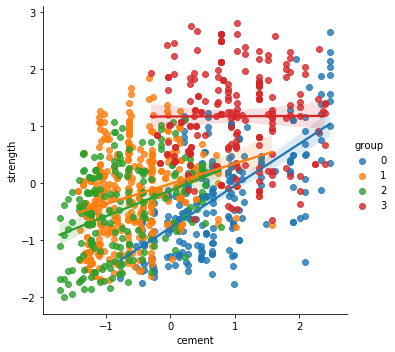

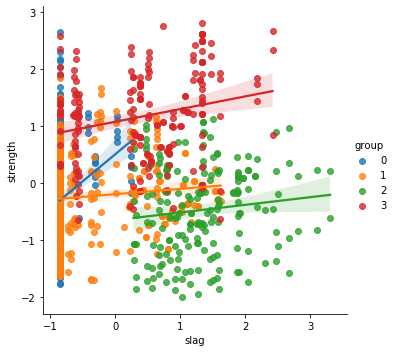

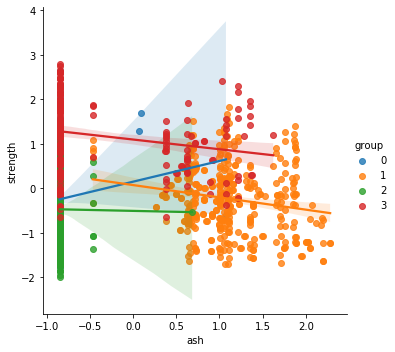

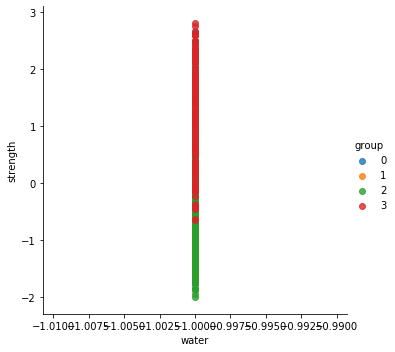

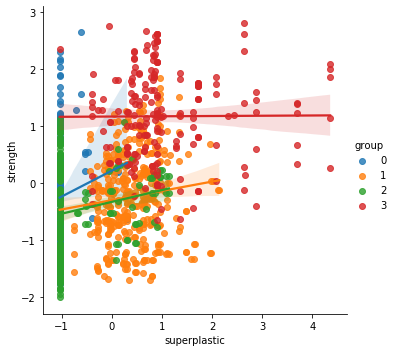

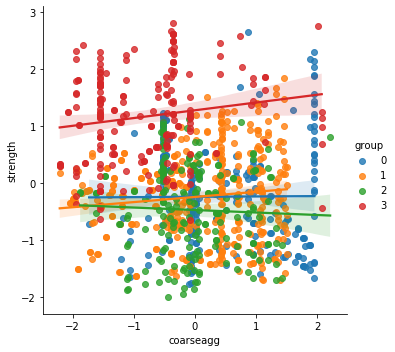

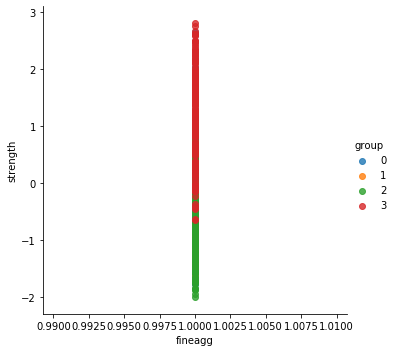

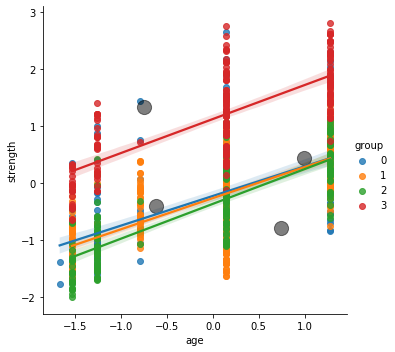

In [16]:
# independent attributes and their suitability to predict strength 
for col in mult_guassian_z.columns[:-2]:              
 sns.lmplot(data=mult_guassian_z, x=col, y='strength', hue='group')

#plotting the clusters
#plt.scatter(mult_guassian_z,y='strength', s=50, cmap='viridis')
centroids =km_conc.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [20]:
#FROM THE K MEANS CLUSTERING  IT CAN BE INFERRED THAT CEMENT,SLAG,ASH AND WATER ARE THE MOST IMPORTANT ATTRIBUTES FOR 
#STRENGTH PREDICTION

#2c Applying PCA function and splitting data
from sklearn.model_selection import train_test_split
pca = PCA(n_components =4 ,random_state=0) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
X_pca=concrete[['cement','water','ash','slag']]

#3) since the target variable is continous this is requires a regression model
#a linear regression model is tried first 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred_lin=lin.predict(X_test)

print('Mean Absolute Error for Linear Regression:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Mean Squared Error for Linear Regression  :', metrics.mean_squared_error(y_test, y_pred_lin))
print('Root Mean Squared Error for Linear Regressio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

Mean Absolute Error for Linear Regression: 10.050134596398435
Mean Squared Error for Linear Regression  : 153.37999868871034
Root Mean Squared Error for Linear Regressio: 12.384667887703342


In [21]:
#Since ensemble models tend to perform better than invidual models we compare various ensemble regression model.
import warnings
warnings.filterwarnings('ignore')

#ensemble using RANDOMFOREST REGRESSOR
from sklearn import model_selection
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(random_state=0)
#Hyperparameter tuning
grid = { 
    'n_estimators': [10,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(2,10),
    'criterion' :['mse', 'mae']
}

grid_forest = GridSearchCV(forest,param_grid=grid,cv=5,verbose=0)
best_forest = grid_forest.fit(X, y)
# print best hyperparameters

print('best params RandomForest',best_forest.best_params_)

best params RandomForest {'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}


In [23]:
#best params RandomForest {'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}

grid_for=RandomForestRegressor(criterion='mse',max_depth=9,max_features='auto',n_estimators=100,random_state=0)
grid_for.fit(X_train,y_train)
y_pred_forest=grid_for.predict(X_test)

rmse_forest=np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))
print('Mean Absolute Error for RandomForest:', metrics.mean_absolute_error(y_test, y_pred_forest))
print('Mean Squared Error for RandomForest :', metrics.mean_squared_error(y_test, y_pred_forest))
print('Root Mean Squared Error for RandomForest:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))
      

Mean Absolute Error for RandomForest: 7.689571595490029
Mean Squared Error for RandomForest : 107.95188011577943
Root Mean Squared Error for RandomForest: 10.389989418463305


Randomforest feature importance: cement, importance: 0.31910452473755047
Randomforest feature importance: slag, importance: 0.2553192213793854
Randomforest feature importance: ash, importance: 0.1277909244576215
Randomforest feature importance: water, importance: 0.2977853294254428


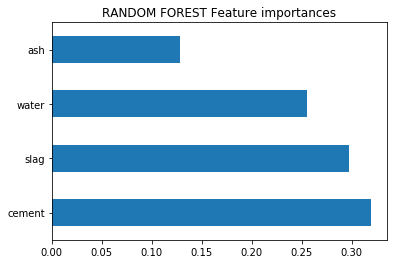

In [24]:
   
Forest_feature_importance=grid_for.feature_importances_
for feat, importance in zip(concrete.columns, Forest_feature_importance):
 print ('Randomforest feature importance: {f}, importance: {i}'.format(f=feat, i=importance))
X_pca=concrete[['cement','water','ash','slag']]
#plot features
plt.title("RANDOM FOREST Feature importances")
(pd.Series(grid_for.feature_importances_, index=X_pca.columns)
   .nlargest(4)
   .plot(kind='barh'))

In [25]:
#USING CROSS VALIDATION
kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(grid_for, X,y, cv=kfold,scoring='neg_mean_squared_error')
print("mean squared error Forestregressor using  crossvalidation is" ,(results_kfold.mean())) 

mean squared error Forestregressor using  crossvalidation is -29.097971575356702


In [26]:
#using GRADIENTBOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(random_state=0)
gb_grid = { 
 'learning_rate': [1, 0.5, 0.25, 0.1],
  'max_depth': np.arange(2, 10),
  'n_estimators' :[10, 100],
  'criterion' :['mse', 'mae']
     }
grid_grad = GridSearchCV(gb,param_grid=gb_grid,cv=3,verbose=0)
best_gb = grid_grad.fit(X, y)

In [27]:
# print best hyperparameters

print('best params for Gradientboosting',best_gb.best_params_)

best params for Gradientboosting {'criterion': 'mse', 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}


In [28]:
#best params for Gradientboosting {'criterion': 'mse', 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
grid_gb=GradientBoostingRegressor(criterion= 'mse', learning_rate= 0.5, max_depth= 5, n_estimators= 100,loss='ls')
grid_gb.fit(X_train,y_train)
y_pred_gb=grid_gb.predict(X_test)
 
print('Mean Absolute Error for Gradientboost:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error for Gradientboost :', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared Error for Gradientboost:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
     )

Mean Absolute Error for Gradientboost: 7.6480115991994015
Mean Squared Error for Gradientboost : 106.6139893255966
Root Mean Squared Error for Gradientboost: 10.325405044142173


In [29]:
Gradient_feature_importance=grid_gb.feature_importances_
for feat, importance in zip(concrete.columns, Gradient_feature_importance):
 print ('Gradient boosting feature importance: {f}, importance: {i}'.format(f=feat, i=importance))

Gradient boosting feature importance: cement, importance: 0.2853909321327663
Gradient boosting feature importance: slag, importance: 0.29270369280320196
Gradient boosting feature importance: ash, importance: 0.15650118133474994
Gradient boosting feature importance: water, importance: 0.2654041937292818


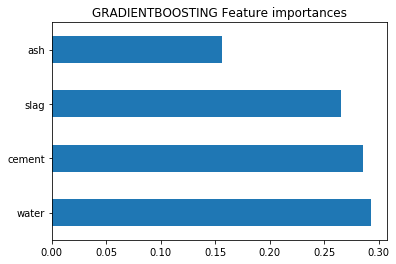

In [30]:
   #plot features
 plt.title("GRADIENTBOOSTING Feature importances")
(pd.Series(grid_gb.feature_importances_, index=X_pca.columns)
   .nlargest(4)
   .plot(kind='barh'))

In [31]:
 #USING CROSS VALIDATION
kfold = model_selection.KFold(n_splits=10)
results_kfold_gb = model_selection.cross_val_score(grid_gb, X,y, cv=kfold,scoring='neg_mean_squared_error')
print("mean squared error Gradientboosting classifier using  crossvalidation is" ,(results_kfold_gb.mean())
     )

mean squared error Gradientboosting classifier using  crossvalidation is -24.169034902353797


In [32]:
#using ADABOOSTREGRESSOR
 
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(random_state=0)
ab_grid = { 
 'learning_rate': [1, 0.5, 0.25, 0.1],
  'n_estimators' :[10, 100],
  'loss' :['linear, square','exponential']
   }
grid_ada = GridSearchCV(ab,param_grid=ab_grid,cv=3,verbose=0)
best_ab = grid_ada.fit(X, y)

# print best hyperparameters

print('best params for Adaboosting',best_ab.best_params_)

best params for Adaboosting {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}


In [33]:
#best params for Adaboosting {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
grid_Ada=AdaBoostRegressor(learning_rate= 0.5, loss='exponential', n_estimators= 100)
grid_Ada.fit(X_train,y_train)
y_pred_Ada=grid_Ada.predict(X_test)


print('Mean Absolute Error for AdAdaoost:', metrics.mean_absolute_error(y_test, y_pred_Ada))
print('Mean Squared Error for AdAdaoost :', metrics.mean_squared_error(y_test, y_pred_Ada))
print('Root Mean Squared Error for AdAdaoost:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ada))
     )

Mean Absolute Error for AdAdaoost: 10.223941395168202
Mean Squared Error for AdAdaoost : 152.71086974417045
Root Mean Squared Error for AdAdaoost: 12.357623952207417


In [34]:
Ada_feature_importance=grid_Ada.feature_importances_
for feat, importance in zip(concrete.columns, Ada_feature_importance):
 print ('Ada boosting feature importance: {f}, importance: {i}'.format(f=feat, i=importance))

Ada boosting feature importance: cement, importance: 0.3883441025450824
Ada boosting feature importance: slag, importance: 0.20177216953104662
Ada boosting feature importance: ash, importance: 0.10021928837955885
Ada boosting feature importance: water, importance: 0.3096644395443122


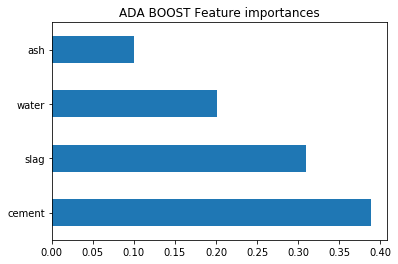

In [37]:

#plot features
plt.title("ADA BOOST Feature importances")
(pd.Series(grid_Ada.feature_importances_, index=X_pca.columns)
   .nlargest(4)
   .plot(kind='barh'))

In [38]:
 #USING CROSS VALIDATION
kfold = model_selection.KFold(n_splits=10)
results_kfold_ab = model_selection.cross_val_score(grid_Ada, X,y, cv=kfold,scoring='neg_mean_squared_error')
print("mean squared error Adaboost classifier using  crossvalidation is" ,(results_kfold_ab.mean())) 

mean squared error Adaboost classifier using  crossvalidation is -68.07709363661353


In [39]:
#3 DIFFERENT ALGORITHMS GAVE DIFFERENT FEATURE IMPORTANCE RANKINGS.
#RANDOMFOREST CLASSIFIER FEATURE IMPORTANCE RANKING IN DESCENDING ORDER:
#1)CEMENT
#2)WATER
#3)SLAG
#4)ASH
#GRADIENTBOOSTING CLASSIFIER FEATURE IMPORTANCE RANKING  IN DESCENDING ORDER
#1)SLAG
#2)CEMENT
#3)WATER
#4)ASH
#ADATBOOSTER CLASSIFIER FEATURE IMPORTANCE RANKING  IN DESCENDING ORDER
#1)CEMENT
#2)WATER
#3)SLAG
#4)ASH 

#RANDOMFORESTCLASSFIER HAS THE LOWEST  RMSE AMONGST ALL THE 3 ENSEMBLE MODELs AND LINEAR REGRESSION INDICATING THAT IT PERFORMS THE BEST


#4)using lasso and ridge regression to extract extra performance without under or overfitting

from sklearn.linear_model import Lasso,Ridge

lasso=Lasso()
#hyperparameter turning
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid_lasso=GridSearchCV(lasso,param_grid=lasso_params,cv=3,verbose=0)
best_lasso=grid_lasso.fit(X,y)
print('best params for lasso',best_lasso.best_params_)

best params for lasso {'alpha': 0.03}


In [40]:
#best params for lasso {'alpha': 0.03}

lasso_hyp=Lasso(alpha=0.03)
lasso_hyp.fit(X_train,y_train)
y_pred_lasso=lasso_hyp.predict(X_test)
print('Mean Absolute Error for lasso:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared Error for lasso :', metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error for lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

Mean Absolute Error for lasso: 10.05010483245053
Mean Squared Error for lasso : 153.3797163805417
Root Mean Squared Error for lasso: 12.384656490211656


In [41]:
ridge=Ridge()
#hyperparameter turning
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
grid_ridge=GridSearchCV(ridge,param_grid=ridge_params,cv=3,verbose=0)
best_ridge=grid_ridge.fit(X,y)
print('best params for ridge',best_ridge.best_params_)

best params for ridge {'alpha': 500}


In [42]:
ridge_hyp=Ridge(alpha=500)
ridge_hyp.fit(X_train,y_train)
y_pred_ridge=ridge_hyp.predict(X_test)
print('Mean Absolute Error for ridge:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Mean Squared Error for ridge :', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error for ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error for ridge: 10.050104271179837
Mean Squared Error for ridge : 153.38028311862038
Root Mean Squared Error for ridge: 12.384679370844463


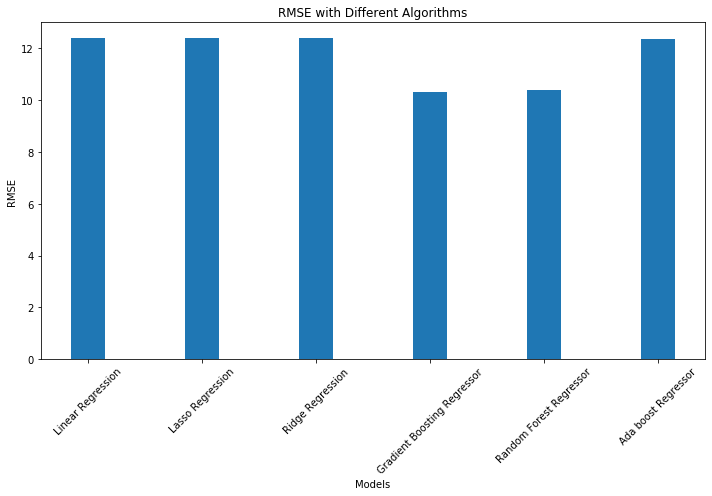

In [43]:
#Comparison of the Root mean squared error(RMSE) value of various algorithms(lower RMSE means better fit)
models = [lin, lasso_hyp, ridge_hyp, grid_gb, grid_for,grid_Ada] 
#names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor"] rmses = [] 
names = ['Linear Regression','Lasso Regression','Ridge Regression','Gradient Boosting Regressor','Random Forest Regressor','Ada boost Regressor'] 
rmses = [] 
for model in models: 
   rmses.append(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
fig.tight_layout() 
plt.show()

In [45]:
#function for calculating model performance at 95% confidence
from matplotlib import pyplot
from sklearn.utils import resample
values =concrete.values
# Number of bootstrap samples to create
n_iterations = 10       
# size of a bootstrap sample
n_size = int(len(concrete) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
def ci(model):
    
 stats = list()   
 for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    #rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    model.fit(train[:,:-1],train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = model.score(test[:, :-1] , y_test)
    predictions = model.predict(test[:, :-1])  

    stats.append(score)
# plot scores

    #pyplot.hist(stats)
    #pyplot.show()
    #this had been commented off as the numbers of plots are high 10/model.
# confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(stats, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
 return lower*100, upper*100
 
print("model performance range of linear regression at 95% confidence level is:", ci(lin))
print("model performance range of Random forest regressor at 95% confidence level is:", ci(grid_for))
print("model performance range of Gradientboosting regressor at 95% confidence level is:",ci(grid_gb))
print("model performance range of Adaboost regressor at 95% confidence level is:", ci(grid_ada))
print("model performance range of Lasso regression at 95% confidence level is:", ci(lasso_hyp))
print("model performance range of Ridge regression at 95% confidence level is:", ci(ridge_hyp))

model performance range of linear regression at 95% confidence level is: (76.82118355220918, 80.01256486457365)
model performance range of Random forest regressor at 95% confidence level is: (82.90548566019706, 86.47386637912253)
model performance range of Gradientboosting regressor at 95% confidence level is: (82.18383958994899, 89.12437857969037)
model performance range of Adaboost regressor at 95% confidence level is: (70.78550649894899, 77.67309791806525)
model performance range of Lasso regression at 95% confidence level is: (75.31732025385915, 79.74244846287026)
model performance range of Ridge regression at 95% confidence level is: (74.24109344377395, 79.25448864493538)
